[The Movie DB](https://www.themoviedb.org/) has a free API to programmatically access information about movies.

In order to get started with TMDB:
  1. [Create a free account](https://www.themoviedb.org/account/signup)
  2. Check your e-mail to verify your account.
  3. Visit the [API Settings page](https://www.themoviedb.org/settings/api) in your Account Settings and request an api key 
  4. You should now have an API key and be ready to go!
  

In [44]:
import config
import requests

In [45]:
api_key = config.tmdb_api_key

In [46]:
response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' + api_key + '&language=en-US')

In [47]:
movie_list = response.json()

In [48]:
movie_list

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

What are the highest grossing U.S. films?

In [58]:
responsed = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key +'&certification_country=US&certification=R&sort_by=revenue.desc&with_cast=3896')

In [103]:
revenue_list = responsed.json()

In [185]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc')

In [186]:
highest_revenue = response.json()

In [187]:
highest_revenue_films = highest_revenue['results']

In [188]:
import locale
locale.setlocale( locale.LC_ALL, '' )

'en_US.UTF-8'

In [259]:
import numpy as np
import pandas
columns = ['film', 'revenue']

df = pandas.DataFrame(columns=columns)

In [260]:
for film in highest_revenue_films:
    print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']]
    


Beauty and the Beast
$1,221,782,049.00
The Fate of the Furious
$1,212,583,865.00
Guardians of the Galaxy Vol. 2
$744,784,722.00
Logan
$608,578,340.00
Kong: Skull Island
$565,151,307.00
The Boss Baby
$408,277,625.00
Fifty Shades Darker
$378,827,494.00
xXx: Return of Xander Cage
$346,302,504.00
The Lego Batman Movie
$310,032,902.00
Kung Fu Yoga
$255,000,000.00
Baahubali 2: The Conclusion
$230,000,000.00
Get Out
$229,570,292.00
Ghost in the Shell
$169,664,622.00
John Wick: Chapter 2
$161,697,595.00
Power Rangers
$139,949,438.00
Life
$73,756,287.00
The Shack
$56,706,948.00
T2 Trainspotting
$41,412,709.00
How to Be a Latin Lover
$26,251,899.00
CHiPS
$25,281,326.00


In [262]:
df.head()

,film,revenue
0,Beauty and the Beast,1221782049
1,The Fate of the Furious,1212583865
2,Guardians of the Galaxy Vol. 2,744784722
3,Logan,608578340
4,Kong: Skull Island,565151307


In [263]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

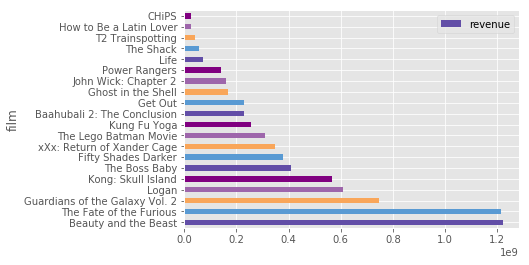

In [271]:
df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=df['film'])


In [254]:
highest_revenue_films

[{'adult': False,
  'backdrop_path': '/7QshG75xKCmClghQDU1ta2BTaja.jpg',
  'genre_ids': [10402, 10751, 14, 10749],
  'id': 321612,
  'original_language': 'en',
  'original_title': 'Beauty and the Beast',
  'overview': "A live-action adaptation of Disney's version of the classic 'Beauty and the Beast' tale of a cursed prince and a beautiful young woman who helps him break the spell.",
  'popularity': 147.396314,
  'poster_path': '/tWqifoYuwLETmmasnGHO7xBjEtt.jpg',
  'release_date': '2017-03-16',
  'title': 'Beauty and the Beast',
  'video': False,
  'vote_average': 6.8,
  'vote_count': 2739},
 {'adult': False,
  'backdrop_path': '/jzdnhRhG0dsuYorwvSqPqqnM1cV.jpg',
  'genre_ids': [28, 80, 53],
  'id': 337339,
  'original_language': 'en',
  'original_title': 'The Fate of the Furious',
  'overview': 'When a mysterious woman seduces Dom into the world of crime and a betrayal of those closest to him, the crew face trials that will test them as never before.',
  'popularity': 34.964414,
  'po